<a href="https://colab.research.google.com/github/Krishna421808/Charts/blob/main/pyafTimeForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# For demonstration purposes, I will use synthetic data generated from StatsForecast. Using the following code, I would acquire synthetic data recorded monthly

In [3]:
pip install statsforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.4/372.4 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.9/187.9 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.6/154.6 kB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 13.9 MB/s eta 0:00:0

In [4]:
from statsforecast.utils import generate_series
synthetic_panel = generate_series(n_series=1, freq = 'M')
synthetic_panel.head()

/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


,ds,y
unique_id,,
0,2000-01-31,0.296422
0,2000-02-29,1.422133
0,2000-03-31,2.428973
0,2000-04-30,3.423626
0,2000-05-31,4.311782


In [5]:
# split the dataset into training and test data. I would take the last 6 observations for test data, and the rest were assigned as training data.
Y_train_df = synthetic_panel[:-6]
Y_test_df = synthetic_panel[-6:]

In [6]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA, ETS

In [7]:
# The parameter we would pass is the season length (using 12 because of 12 months in a year), and the ‘ZMZ’ model for ETSto adjust the model optimally. Also, I set up the horizon variable as the length of our prediction.
season_length = 12
horizon = len(Y_test_df)
models = [
AutoARIMA(season_length=season_length),
ETS(season_length=season_length, model='ZMZ')
]
model = StatsForecast(
df=Y_train_df,
models=models,
freq='M',
n_jobs=-1)

/usr/local/lib/python3.10/dist-packages/statsforecast/models.py:732: FutureWarning: `ETS` will be deprecated in future versions of `StatsForecast`. Please use `AutoETS` instead.
  ETS._warn()


In [8]:
%time
Y_hat_df = model.forecast(horizon).reset_index()
Y_hat_df.head()

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs


,unique_id,ds,AutoARIMA,ETS
0,0,2018-01-31,0.297650,0.285181
1,0,2018-02-28,1.223331,1.262057
2,0,2018-03-31,2.214119,2.241013
3,0,2018-04-30,3.361339,3.363299
4,0,2018-05-31,4.228890,4.269345


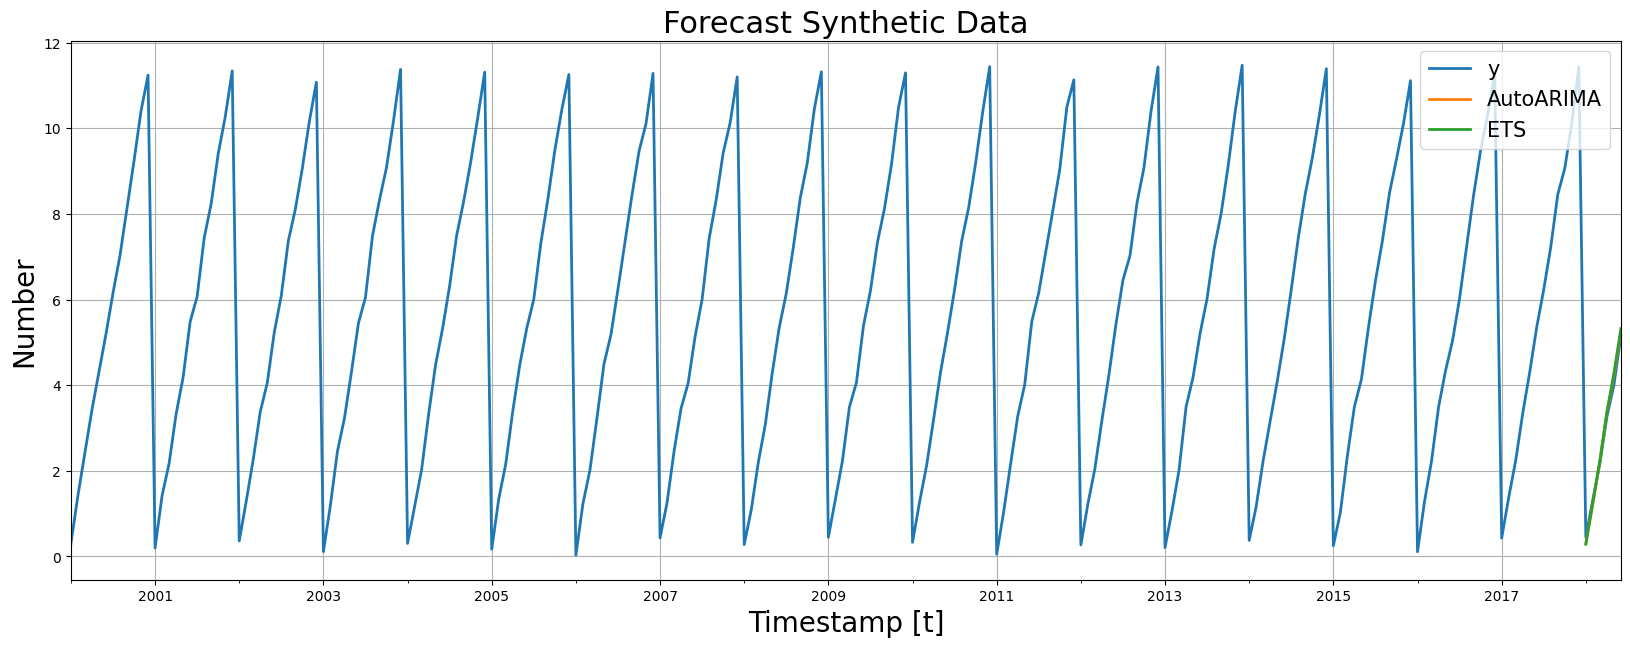

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(1, 1, figsize = (20, 7))
Y_hat_df = Y_test_df.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])
plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index('ds')
plot_df[['y', 'AutoARIMA', 'ETS']].plot(ax=ax, linewidth=2)
ax.set_title('Forecast Synthetic Data', fontsize=22)
ax.set_ylabel('Number', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [ ]:
# Python Automatic Forecasting is an open-source Python package to automatically develop time-series forecasting models (either univariate or with exogenous data). The model was built on top of Scikit-Learn and Pandas, so expect familiar APIs.

In [10]:
pip install pyaf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.0/127.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.5 MB/s eta 0:00:00


In [11]:
horizon = len(Y_test_df)
import pyaf.ForecastEngine as autof
#set up the model engine
lEngine = autof.cForecastEngine()
# get the best time series model for test prediction
lEngine.train(iInputDS = Y_train_df, iTime = 'ds', iSignal = 'y', iHorizon = horizon)

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [12]:
forecast_df= lEngine.forecast(Y_train_df, horizon)

/usr/local/lib/python3.10/dist-packages/pyaf/TS/Signal_Transformation.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[self.get_name(isig)] = self.apply(df[isig])


<Axes: xlabel='ds'>

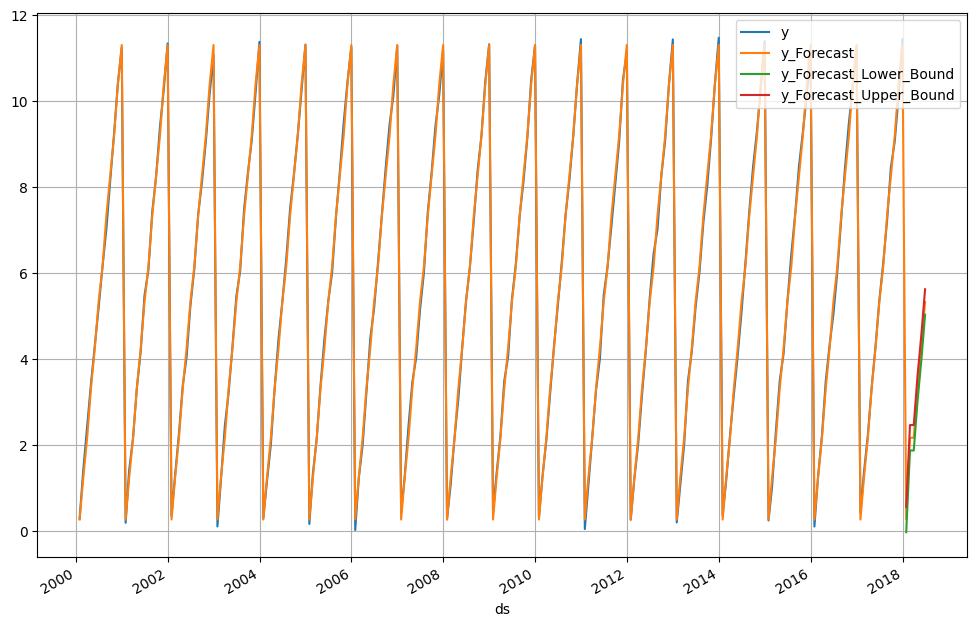

In [13]:
forecast_df.plot.line('ds', ['y' , 'y_Forecast','y_Forecast_Lower_Bound', 'y_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))